  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 949.2/949.2 kB 11.1 MB/s  0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 8.7 MB/s  0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15618 sha256=09bdba7003b09edec88425165e850949bb6bd4988ce8de60031a2418b1663029
  Stored in directory: c:\users\deepa\appdata\local\pip\cache\wheels\cc\bd\6f\664d62c99327abeef7d86489e6631cbf

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 926.2/926.2 kB 8.5 MB/s  0:00:00


C:\Users\Deepa\AppData\Local\Temp\ipykernel_26524\1271371233.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('^GSPC', start='2020-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Ticker         ^GSPC
Date                
2020-01-03 -0.705987
2020-01-06  0.353337
2020-01-07 -0.280324
2020-01-08  0.490245
2020-01-09  0.665526
...              ...
2024-12-24  1.104276
2024-12-26 -0.040566
2024-12-27 -1.105574
2024-12-30 -1.070200
2024-12-31 -0.428480

[1257 rows x 1 columns]
Example 1-ARCH(1) on S&P 500 Returns
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  ^GSPC   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1974.89
Distribution:                  Normal   AIC:                           3955.79
Method:            Maximum Likelihood   BIC:                           3971.19
                                        No. Observations:                 1257
Date:                Wed, Oct 15 2025   Df Residuals:                     1256
Time:                        00:2

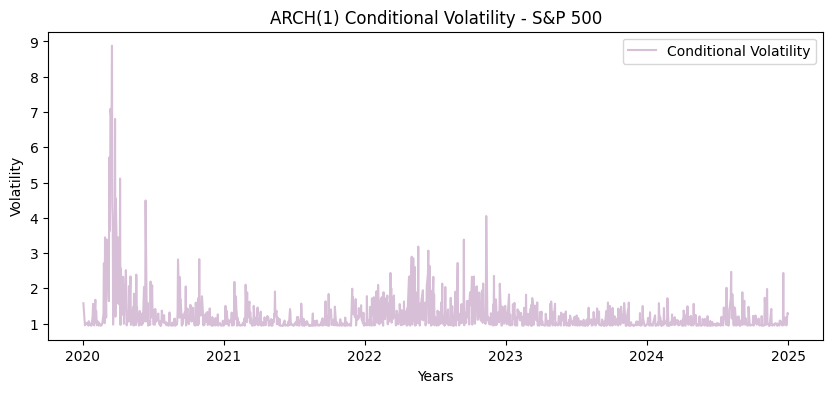

In [1]:
#arch
!pip install yfinance 
!pip install arch 
import yfinance as yf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from arch import arch_model 
data = yf.download('^GSPC', start='2020-01-01', end='2025-01-01') 
returns = 100 * data['Close'].pct_change().dropna() 
print(returns)

model = arch_model(returns, vol = "ARCH", p=1) 
fit = model.fit(disp = "off") 
print("Example 1-ARCH(1) on S&P 500 Returns") 
print(fit.summary())

plt.figure(figsize=(10, 4)) 
plt.plot(fit.conditional_volatility, label = "Conditional Volatility", color = "thistle") 
plt.title("ARCH(1) Conditional Volatility - S&P 500") 
plt.xlabel("Years") 
plt.ylabel("Volatility") 
plt.legend() 
plt.show() 

In [ ]:
#garch
!pip install yfinance 
!pip install arch 
import yfinance as yf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from arch import arch_model 

gold = yf.download('GLD', start='2020-01-01', end='2025-01-01') 
gold_returns = 100 * gold['Close'].pct_change().dropna() 
print(gold_returns.head())

model = arch_model(gold_returns, vol = "GARCH", p=1, q=1) 
fit = model.fit(disp = "off") 
print("\nExample 3-GARCH(1,1) on Gold Returns") 
print(fit.summary())

plt.plot(fit.conditional_volatility, label = "Volatility", color = "palevioletred") 
plt.title("GARCH(1,1) Conditional Volatility - Gold") 
plt.xlabel("Years") 
plt.ylabel("Volatility") 
plt.legend() 
plt.show() 

In [ ]:
#ar and garch
!pip install yfinance 
!pip install arch 
import yfinance as yf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from arch import arch_model 

model = arch_model(returns, mean = "AR", lags=1, vol = "GARCH", p=1, q=1) 
fit = model.fit(disp = "off") 
print("\nExample 4-ARIMA(1)-GARCH(1,1) on Gold Returns") 
print(fit.summary()) 

plt.figure(figsize=(10, 4)) 
plt.plot(fit.conditional_volatility, label = "Volatility", color = "cyan") 
plt.title("AR(1)-GARCH(1,1) Conditional Volatility - S&P 500") 
plt.xlabel("Years") 
plt.ylabel("Volatility") 
plt.legend() 
plt.show() 


In [ ]:
#garch compare
!pip install yfinance 
!pip install arch 
import yfinance as yf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from arch import arch_model 
data = yf.download('^GSPC', start='2020-01-01', end='2025-01-01') 
returns = 100 * data['Close'].pct_change().dropna() 
print(returns)

model = arch_model(returns, vol = "GARCH", p=1, q=1)
fit = model.fit(disp = "off") 
print("\nExample 2-GARCH(1,1) on S&P 500 Returns") 
print(fit.summary())

plt.figure(figsize=(10, 4)) 
plt.plot(fit.conditional_volatility, label = "Conditional Volatility", color = "plum") 
plt.xlabel("Years") 
plt.ylabel("Volatility") 
plt.legend() 
plt.title("GARCH(1,1) Conditional Volatility - S&P 500") 
plt.show()

#Comparing GARCH(1,1) VS GARCH(2,1)
#Step 1 
models = [(1,1), (2,1)] 
results = [] 
#Step 2: Fit Model 
for p,q in models: 
  model = arch_model(returns, vol = "GARCH", p=p, q=q) 
  fit = model.fit(disp = "off") 
  results.append({"Model":f"GARCH({p},{q})", 
                  "AIC":fit.aic, 
                  "BIC":fit.bic, 
                  "LogLik":fit.loglikelihood}) 
#Step 3: Print 
df = pd.DataFrame(results) 
print("\nExample 5-Model Comparison") 
print(df) 
#Use AIC BIC to choose the best GARCH specification (lower values indicate better fit)

In [ ]:
#Simulate and Fit ARCH(1) Model 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from arch import arch_model 
#Step 1: Simulate synthetic data (volatility clustering) 
np.random.seed(42) 
n = 500 
eps = np.random.normal(size = n) 
vol = np.zeros(n) 
ret = np.zeros(n) 
 
alpha0, alpha1 = 0.1, 0.8 #ARCH(1) parameters 
 
for t in range(1, n): 
  vol[t] = np.sqrt(alpha0 + alpha1 * ret[t-1] ** 2) 
  ret[t] = vol[t] * eps[t] 
 
series = pd.Series(ret) 
print(series) 

#Fit ARCH(1) model 
arch_fit = arch_model(series, vol = "ARCH", p=1).fit(disp = "off") 
print(arch_fit.summary())

#plot volatility 
plt.figure(figsize=(10, 4)) 
plt.plot(arch_fit.conditional_volatility, label = "ARCH(1) Conditional Volatility", color = "pink") 
plt.title("ARCH(1) Conditional Volatility - Synthetic Data") 
plt.xlabel("Years") 
plt.ylabel("Volatility") 
plt.legend() 
plt.show() 


In [ ]:
#Simulate GARCH(1,1) process 
!pip install yfinance 
!pip install arch 
import yfinance as yf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from arch import arch_model
np.random.seed(123) 
n = 500 
eps = np.random.normal(size = n) 
vol = np.zeros(n) 
ret = np.zeros(n)  
omega, alpha, beta = 0.05, 0.1, 0.85 
for t in range(1,n): 
    vol[t] = np.sqrt(omega + alpha * ret[t-1] ** 2 + beta * vol[t-1] ** 2) 
    ret[t] = vol[t] * eps[t]
series = pd.Series(ret) 
print(series) 

#Fit GARCH(1,1) 
garch_fit = arch_model(series, vol = "GARCH", p=1, q=1).fit(disp = "off") 
print("\nProgram 2: GARCH(1,1) Synthetic Data") 
print(garch_fit.summary())

plt.figure(figsize=(10, 4)) 
plt.plot(garch_fit.conditional_volatility, label = "GARCH(1,1) Conditional Volatility", color 
= "lightblue") 
plt.title("GARCH(1,1) Conditional Volatility - Synthetic Data") 
plt.xlabel("Years") 
plt.ylabel("Volatility") 
plt.legend() 
plt.show() 

In [ ]:
# Compare ARCH(1) vs GARCH(1,1)
!pip install yfinance 
!pip install arch 
import yfinance as yf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from arch import arch_model
arch_fit = arch_model(series, vol = "ARCH", p=1).fit(disp = "off")
print("\nProgram 3 - Model Comparison on Same Synthetic Data") 
print("ARCH(1)- AIC:", arch_fit.aic, "BIC: ", arch_fit.bic) 
print("GARCH(1,1)- AIC:", garch_fit.aic, "BIC: ", garch_fit.bic) 

#AR(1)-GARCH(1,1) (Mean + Volatility) 
#Generate AR(1) - GARCH(1,1) synthetic series 
np.random.seed(99) 
n = 500 
eps = np.random.normal(size=n) 
ret = np.zeros(n) 
vol = np.zeros(n) 
 
phi = 0.3 #AR(1) parameter 
omega, alpha, beta = 0.05, 0.1, 0.85 #GARCH(1,1) parameters 
 
for t in range(1, n): 
    vol[t] = np.sqrt(omega + alpha * (ret[t-1] ** 2) + beta * (vol[t-1] ** 2)) 
    ret[t] = phi * ret[t-1] + eps[t] 
series = pd.Series(ret) 
print(series) 
ar_garch_fit = arch_model(series, mean = "AR", lags=1, vol = "GARCH", p=1, q=1).fit(disp 
= "off") 
print("\nProgram 9 - AR(1)-GARCH(1,1) on Synthetic Data") 
print(ar_garch_fit.summary())

In [ ]:
#ARIMA + ARCH on Stock Returns (Daily Data) 
import numpy as np 
import pandas as pd 
import yfinance as yf 
from statsmodels.tsa.arima.model import ARIMA 
from arch import arch_model 
import matplotlib.pyplot as plt 
ticker = 'AAPL' 
data = yf.download(ticker, start='2015-01-01', end='2023-12-31', progress=False) 
data = data['Close'].dropna() 
display(data.head())
returns = np.log(data).diff().dropna() 
arima_order = (1, 0, 1) 
arima_model = ARIMA(returns, order=arima_order) 
arima_result = arima_model.fit() 
print(arima_result.summary()) 
arch_res = arch_model_obj.fit(update_freq=5) 
print(arch_res.summary())
horizon = 5 
arima_fore = arima_result.get_forecast(steps=horizon) 
vol_fore = arch_res.forecast(horizon=horizon) 
print('Mean forecast:\n', arima_fore.predicted_mean.tail(horizon)) 
print('Volatility forecast:\n', vol_fore.variance.tail(horizon))
#residuals
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True) 
ax[0].plot(arima_result.resid, label ='ARIMA residuals', color='palevioletred') 
ax[0].legend() 
ax[1].plot(np.sqrt(arch_res.conditional_volatility), label='Conditional Volatility (ARCH)', color='olive')
ax[1].legend() 
plt.show() 

In [ ]:
#ARIMA + ARCH on Exchange rates of US dollars to Euro 
import pandas as pd 
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.arima.model import ARIMA 
from arch import arch_model 
import matplotlib.pyplot as plt 
data = pd.read_csv('EURUSD_daily.csv', parse_dates = ['timestamp'], index_col='timestamp') 
close = data['close'].dropna() 
display(data.head())
returns = close.pct_change().dropna() * 100 #in percent 
display(returns.head())
adf = adfuller(returns) 
print(f'ADF p-value: {adf[1]}') 
model_arima = ARIMA(returns, order=(1, 0, 1)) 
result_arima = model_arima.fit() 
print(result_arima.summary())
ARCH(1) on residuals 
am = arch_model(result_arima.resid, vol='ARCH', p=1, o=0, q=0, dist='t') 
res_arch = am.fit(update_freq=5) 
print(res_arch.summary())
steps = 10 
mean_forecast = result_arima.get_forecast(steps=steps) 
vol_forecast = res_arch.forecast(horizon=steps) 
print('Mean forecast:\n', mean_forecast.predicted_mean.tail(steps)) 
print('variance forecast:\n', vol_forecast.variance.tail(steps))